#  2020AIML544 - CLASSIFICATION - ASSIGNMENT3

## Overall Approach

### EDA TASKS PERFORMED:
    1. READ THE EXCEL FILE INTO A DATAFRAME  
    2. CHECK THE STATISTICS OF DATA USING DESCRIBE FUNCTION
    3. CHECK FOR DUPLICATE ROWS & NULL VALUES 
    4. CHANGE TO APPROPRIATE DATATYPES    
    5. SCATTERPLOTS & PAIRPLOTS OF ATTRIBUTES
    6. HEATMAP TO SHOW CORRELATION
    7. HISTOGRAMS TO CHECK DISTRIBUTION & SKEWNESS 
    8. BOXPLOTS TO CHECK OUTLIERS
    9. OULIER DETECTION AND HANDLING USING IQR METHOD

### MODEL BUILDING:
    1. BUILD DECISION TREE FULL DEPTH
    2. FIND ACCURACY SCORES
    
### MODEL PERFORMANCE ANALYSIS:
    1. PRUNING OF DECISION TREE USING ACCURACY MEASURE
    2. PRINT CONFUSION MATRIX & CLASSIFICATION REPORTS
    3. CROSS VALIDATION USING STRATIFIED KFOLD
    4. FIND THE BEST DEPTH OF DECISION TREE  

#### Import all needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## EXPLORATORY DATA ANALYSIS 

### <span style='background : yellow' > **Q-1: Load the dataset and print the metadata in the notebook:**   </span>

#### Read the input excel file into a dataframe

In [2]:
file_path = r"C:\Users\Aspire V3-572\Desktop\AIML Mini Project\Classification\loan_data.CSV"

df = pd.read_csv(file_path,header=0)

#### Display information about the dataframe using head function

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Check the number of records in the dataset using shape function

In [4]:
df.shape

(9578, 14)

There are 9578 records and 14 attributes in the dataset.

Let's take a quick look at the columns

In [5]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

#### Check the statistics of numerical attributes using describe function

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Observation:** This is the statistical summary of the data. We can observe the mean, standard deviation, minimum and maximum values of all the numerical attributes

### <span style='color: Black'>Data Cleaning </span>

<b>
Checking for duplicate rows
</b>

**Observation:** There are no duplicate rows in our dataset

In [7]:
dv = df.duplicated(keep=False)
dv.sum()

0

### <span style='color: Black'>Missing Values Imputation </span>

**Observation:** There are no Null values in the data. 

In [8]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<b>
Check the quality of the data and data types of each column using info function
</b>

**Observation:** The datatype for attribute 'purpose' needs to be changed and datatypes are appropriate for all the attributes. 
However, we need to convert continuous attributes to categorical.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### <span style='background : yellow' > **Q-2: Print a heatmap to check NULL values:**   </span>

<AxesSubplot:>

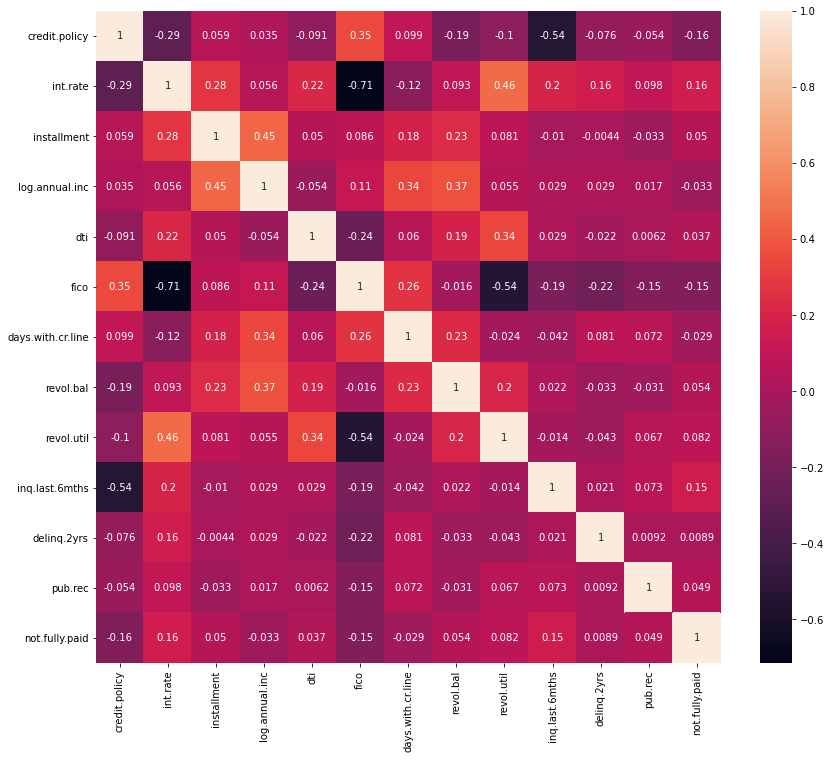

In [10]:
plt.figure(figsize=(14, 12))
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

### HISTOGRAM PLOTS TO CHECK DATA DISTRIBUTION & SKEWNESS
**Observation:** Some of the attributes seem to be right skewed. These will be taken care with outlier removal

[Text(0.5, 1.0, 'histogram of delinq.2yrs')]

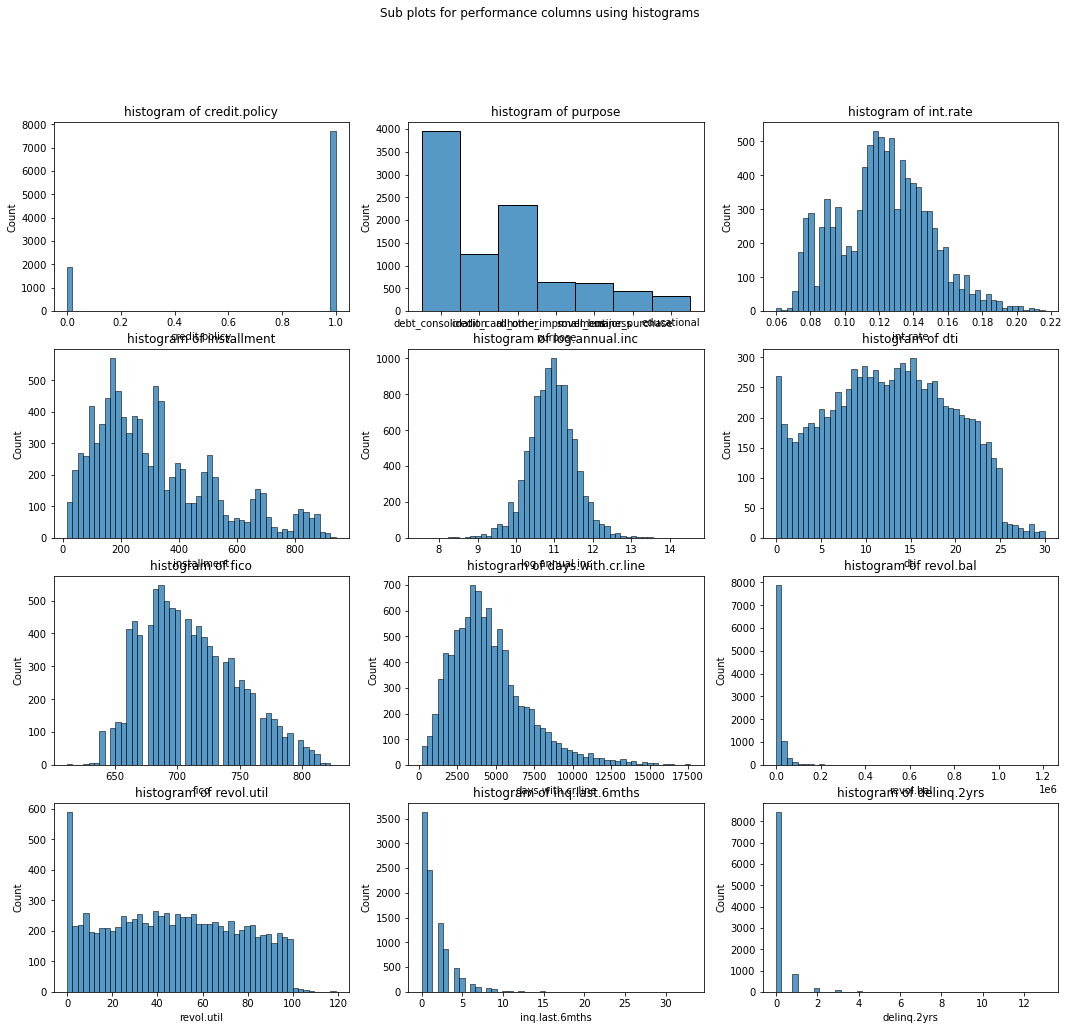

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Sub plots for performance columns using histograms')
sns.histplot(ax=axes[0, 0],data=df,x='credit.policy',bins=50).set(title="histogram of credit.policy")
sns.histplot(ax=axes[0, 1],data=df,x='purpose',bins=50).set(title="histogram of purpose")
sns.histplot(ax=axes[0, 2],data=df,x='int.rate',bins=50).set(title="histogram of int.rate")
sns.histplot(ax=axes[1, 0],data=df,x='installment',bins=50).set(title="histogram of installment")
sns.histplot(ax=axes[1, 1],data=df,x='log.annual.inc',bins=50).set(title="histogram of log.annual.inc")
sns.histplot(ax=axes[1, 2],data=df,x='dti',bins=50).set(title="histogram of dti")
sns.histplot(ax=axes[2, 0],data=df,x='fico',bins=50).set(title="histogram of fico")
sns.histplot(ax=axes[2, 1],data=df,x='days.with.cr.line',bins=50).set(title="histogram of days.with.cr.line")
sns.histplot(ax=axes[2, 2],data=df,x='revol.bal',bins=50).set(title="histogram of revol.bal")
sns.histplot(ax=axes[3, 0],data=df,x='revol.util',bins=50).set(title="histogram of revol.util")
sns.histplot(ax=axes[3, 1],data=df,x='inq.last.6mths',bins=50).set(title="histogram of inq.last.6mths")
sns.histplot(ax=axes[3, 2],data=df,x='delinq.2yrs',bins=50).set(title="histogram of delinq.2yrs")

In [12]:
df1 = df.copy()

cleanup_nums = {"purpose": {"debt_consolidation": 1, "credit_card": 2, "home_improvement": 3, "small_business": 4,
                                  "major_purchase": 5, "educational": 6, "all_other": 0 }
               }

df1 = df1.replace(cleanup_nums)
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<span style='color:Black'>
<b>

BOX PLOT FOR BETTER UNDERSTANDING OF DATA DISTRIBUTION AND OUTLIER DETECTION 
</b>
</span>


[Text(0.5, 1.0, 'boxplot of revol.util')]

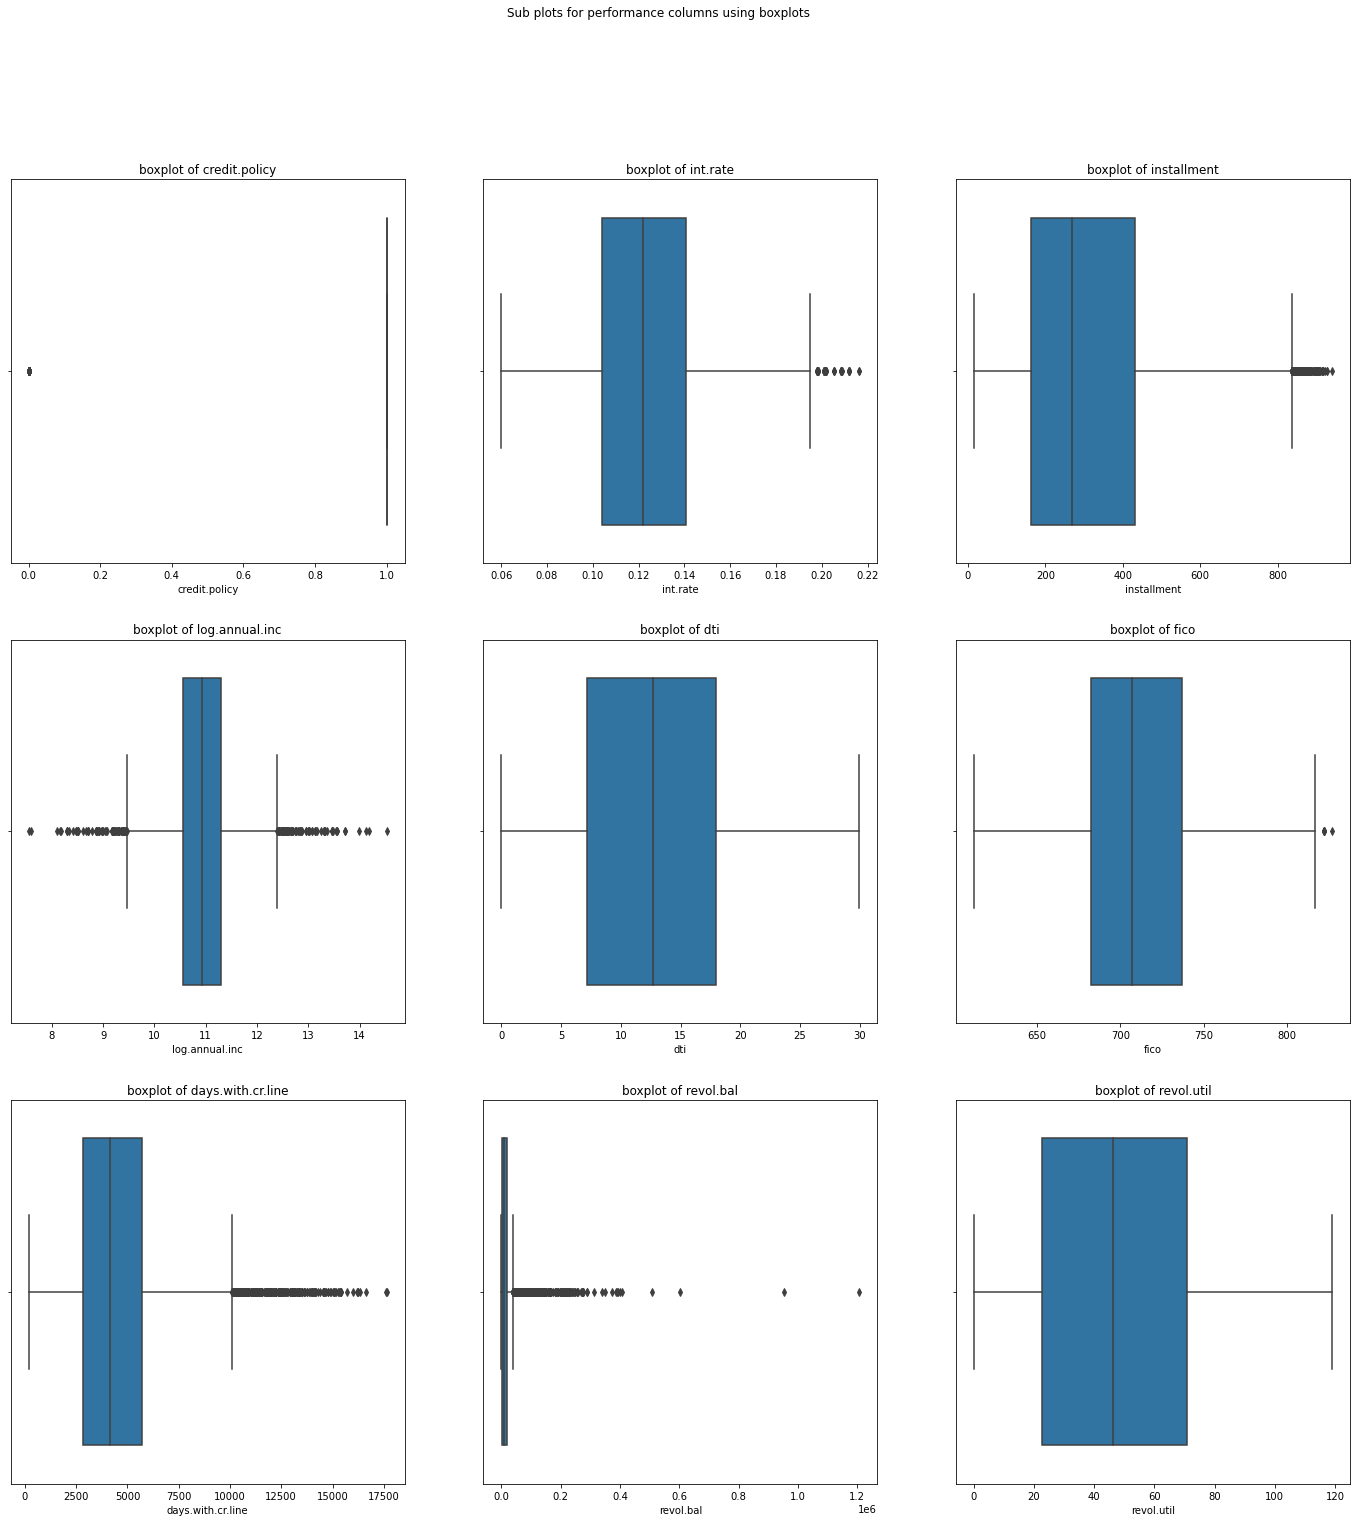

In [13]:
#Now lets do boxplots for all the columns for better understanding of outliers
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
fig.suptitle('Sub plots for performance columns using boxplots')
sns.boxplot(ax=axes[0, 0],data=df1,x='credit.policy').set(title="boxplot of credit.policy")
sns.boxplot(ax=axes[0, 1],data=df1,x='int.rate').set(title="boxplot of int.rate")
sns.boxplot(ax=axes[0, 2],data=df1,x='installment').set(title="boxplot of installment")
sns.boxplot(ax=axes[1, 0],data=df1,x='log.annual.inc').set(title="boxplot of log.annual.inc")
sns.boxplot(ax=axes[1, 1],data=df1,x='dti').set(title="boxplot of dti")
sns.boxplot(ax=axes[1, 2],data=df1,x='fico').set(title="boxplot of fico")
sns.boxplot(ax=axes[2, 0],data=df1,x='days.with.cr.line').set(title="boxplot of days.with.cr.line")
sns.boxplot(ax=axes[2, 1],data=df1,x='revol.bal').set(title="boxplot of revol.bal")
sns.boxplot(ax=axes[2, 2],data=df1,x='revol.util').set(title="boxplot of revol.util")

#### OUTLIER TREATMENT USING IQR METHOD

In [14]:
cols = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']

for col in cols:
    Q1  = df1[col].quantile(0.25) 
    Q3  = df1[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    mean = float(df1[col].mean())
    
    df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])
    df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])
    #replacing all outliers above upper bound by upper bound and below lower bound by lower bound values

[Text(0.5, 1.0, 'boxplot of revol.util')]

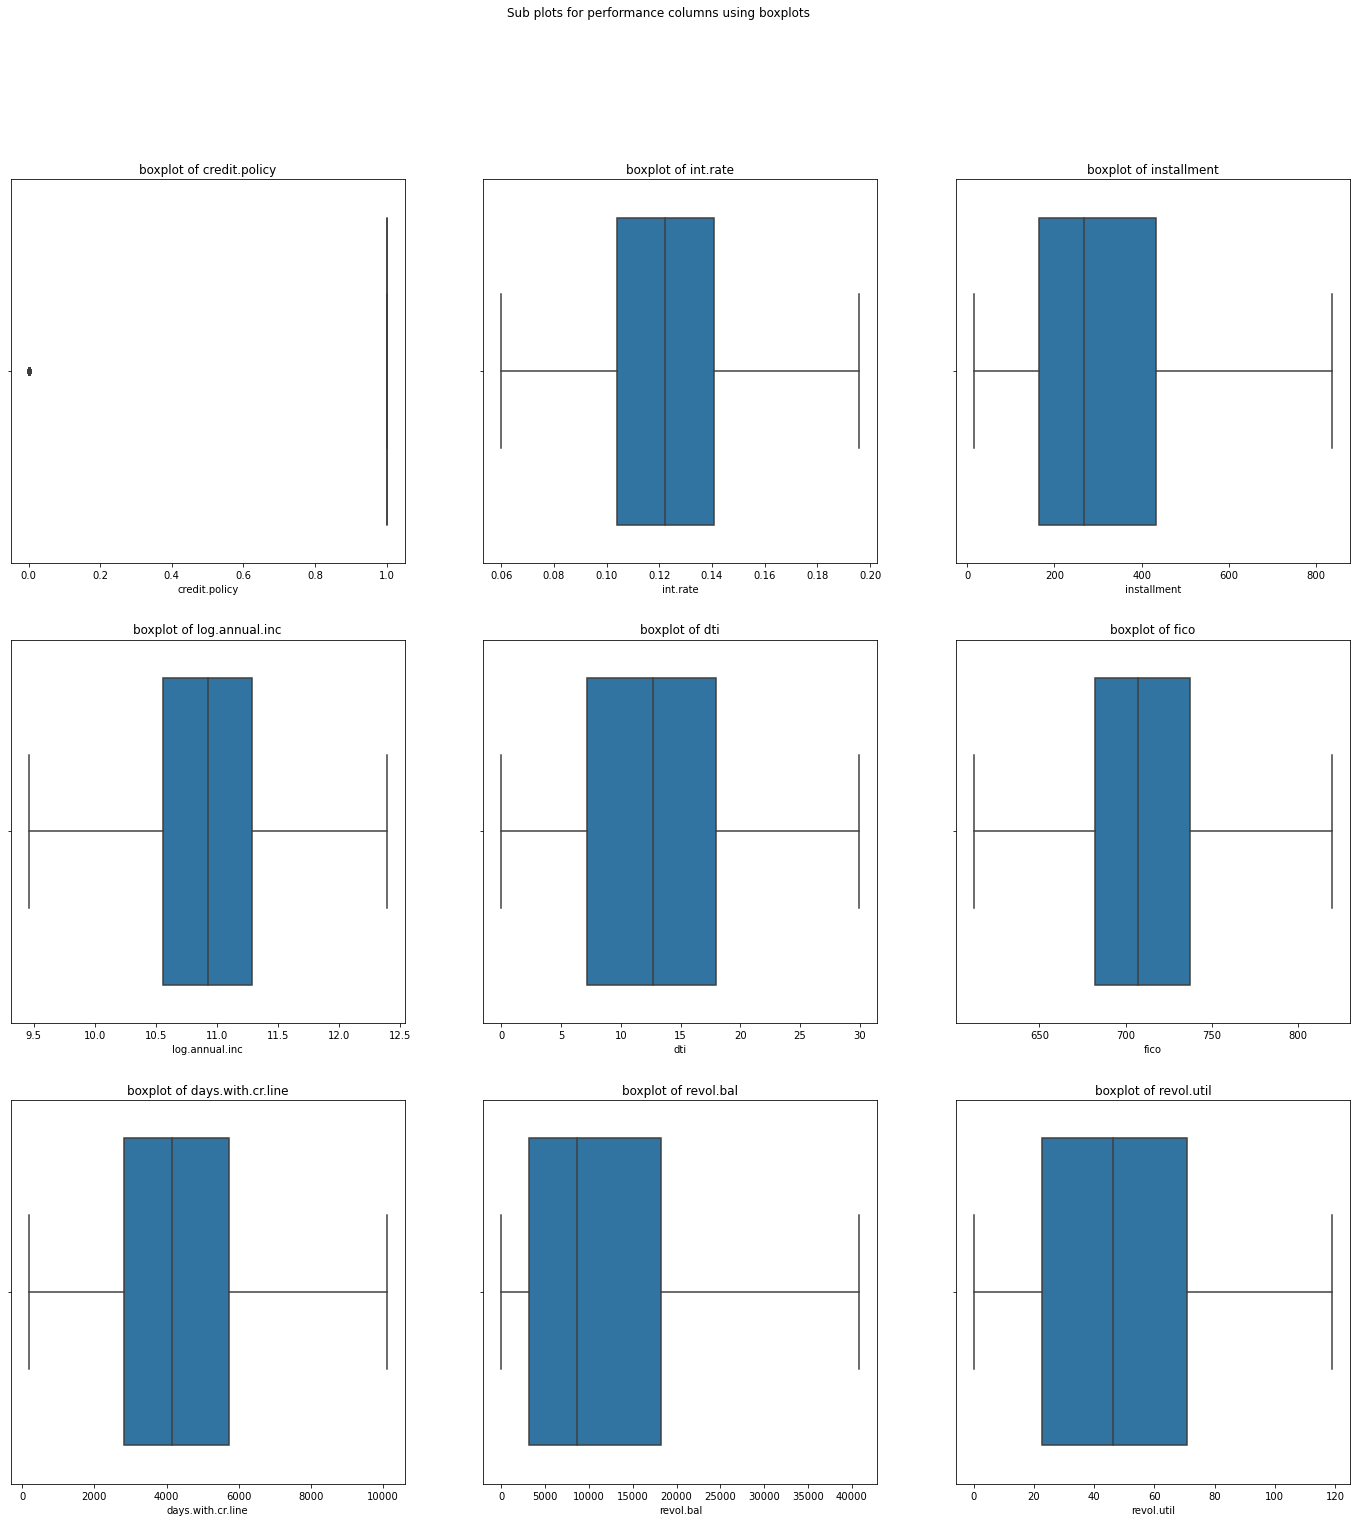

In [15]:
#Now lets do boxplots for all the columns to check the outliers once again
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
fig.suptitle('Sub plots for performance columns using boxplots')
sns.boxplot(ax=axes[0, 0],data=df1,x='credit.policy').set(title="boxplot of credit.policy")
sns.boxplot(ax=axes[0, 1],data=df1,x='int.rate').set(title="boxplot of int.rate")
sns.boxplot(ax=axes[0, 2],data=df1,x='installment').set(title="boxplot of installment")
sns.boxplot(ax=axes[1, 0],data=df1,x='log.annual.inc').set(title="boxplot of log.annual.inc")
sns.boxplot(ax=axes[1, 1],data=df1,x='dti').set(title="boxplot of dti")
sns.boxplot(ax=axes[1, 2],data=df1,x='fico').set(title="boxplot of fico")
sns.boxplot(ax=axes[2, 0],data=df1,x='days.with.cr.line').set(title="boxplot of days.with.cr.line")
sns.boxplot(ax=axes[2, 1],data=df1,x='revol.bal').set(title="boxplot of revol.bal")
sns.boxplot(ax=axes[2, 2],data=df1,x='revol.util').set(title="boxplot of revol.util")

#### DISCRETIZATION

In [16]:
cols = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']

for col in cols:
    group = ['Low','Medium','High']
    df1[col] = pd.cut(df1[col],3,labels=group)
    
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,Medium,High,Medium,Medium,Medium,Medium,High,Medium,0,0,0,0
1,1,2,Medium,Low,Medium,Medium,Medium,Low,High,Medium,0,0,0,0
2,1,1,Medium,Medium,Low,Medium,Medium,Medium,Low,Low,1,0,0,0
3,1,1,Low,Low,Medium,Low,Medium,Low,High,Medium,1,0,0,0
4,1,2,Medium,Low,Medium,Medium,Low,Medium,Low,Low,0,1,0,0


Now, converting the categorical values to numerical for decision tree classifier library 

In [17]:
cleanup_nums = {"int.rate": {"Low": 1, "Medium": 2, "High": 3},
               "installment": {"Low": 1, "Medium": 2, "High": 3},
               "log.annual.inc": {"Low": 1, "Medium": 2, "High": 3},
               "dti": {"Low": 1, "Medium": 2, "High": 3},
               "fico": {"Low": 1, "Medium": 2, "High": 3},
               "days.with.cr.line": {"Low": 1, "Medium": 2, "High": 3},
               "revol.bal": {"Low": 1, "Medium": 2, "High": 3},
               "revol.util": {"Low": 1, "Medium": 2, "High": 3} 
               }

df1 = df1.replace(cleanup_nums)
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,2,3,2,2,2,2,3,2,0,0,0,0
1,1,2,2,1,2,2,2,1,3,2,0,0,0,0
2,1,1,2,2,1,2,2,2,1,1,1,0,0,0
3,1,1,1,1,2,1,2,1,3,2,1,0,0,0
4,1,2,2,1,2,2,1,2,1,1,0,1,0,0


<span style='color:Black'>
<b>

HEATMAP TO CHECK CORRELATION AFTER DISCRETIZATION & OUTLIER REMOVAL
</b>
</span>


<AxesSubplot:>

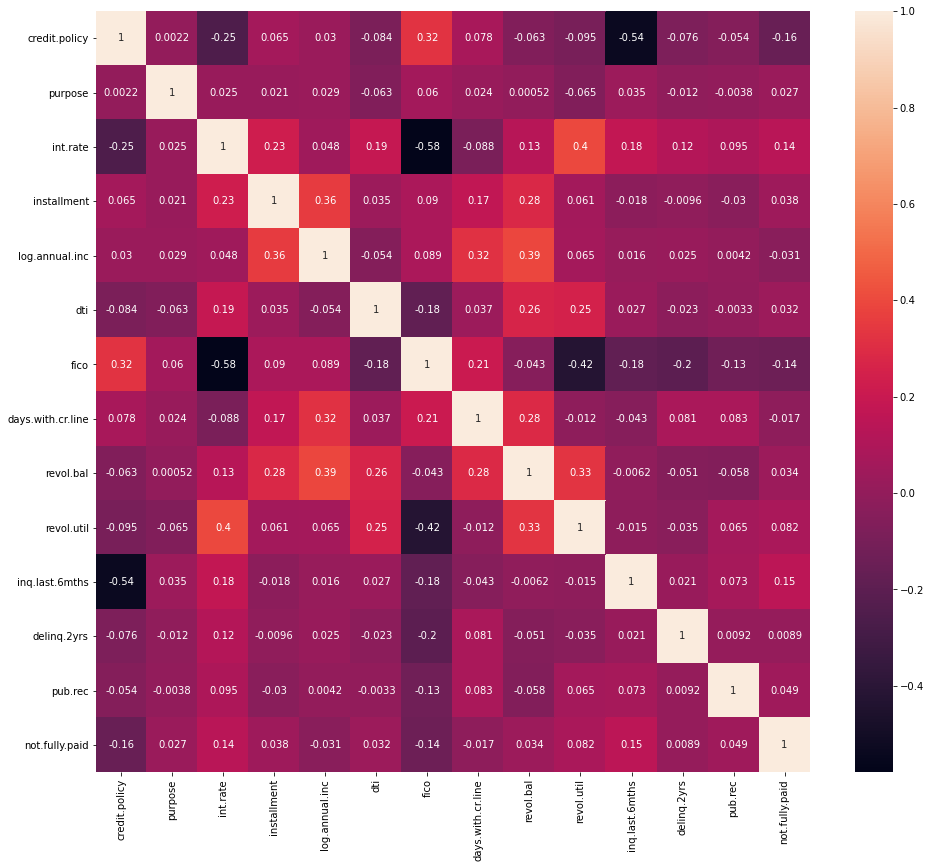

In [18]:
plt.figure(figsize=(16, 14))
correlation = df1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

In [19]:
#Once again, check the datatypes and quality of data using info command, everything looks fine now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   credit.policy      9578 non-null   int64
 1   purpose            9578 non-null   int64
 2   int.rate           9578 non-null   int64
 3   installment        9578 non-null   int64
 4   log.annual.inc     9578 non-null   int64
 5   dti                9578 non-null   int64
 6   fico               9578 non-null   int64
 7   days.with.cr.line  9578 non-null   int64
 8   revol.bal          9578 non-null   int64
 9   revol.util         9578 non-null   int64
 10  inq.last.6mths     9578 non-null   int64
 11  delinq.2yrs        9578 non-null   int64
 12  pub.rec            9578 non-null   int64
 13  not.fully.paid     9578 non-null   int64
dtypes: int64(14)
memory usage: 1.0 MB


### <span style='background : yellow' > **Q-3: Perform stratified splitting of train and test data:**   </span>

### STRATIFIED SPLITTING OF TRAIN AND TEST DATA

#### <span style='color:Black'> Now lets start to prepare our data for Modeling. For this, I am going to split the data into 70:30 for traindata:testdata
    
#### Tried 80:20 & 60:40 split ratios however 70:30 gives better accuracy scores. 
#### Since, we have already discretized the data, not using scaling again.
</span>

In [20]:
X = df1.drop('not.fully.paid', axis=1)
y = df1[["not.fully.paid"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30,stratify=y) 

### <span style='background : yellow' > **Q-4: Build a classifier model using the Decision Tree algorithm:**   </span>

### DECISION TREE CLASSIFIER 

In [21]:
classifier = DecisionTreeClassifier() #default criterion is 'gini index'
classifier = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

#### Now, let's plot the full depth tree

[Text(266.16901999643596, 426.82666666666665, 'X[0] <= 0.5\ngini = 0.269\nsamples = 6704\nvalue = [5631, 1073]'),
 Text(130.56659246558837, 410.72, 'X[10] <= 5.5\ngini = 0.399\nsamples = 1308\nvalue = [948, 360]'),
 Text(106.06099184049198, 394.61333333333334, 'X[1] <= 4.5\ngini = 0.376\nsamples = 1011\nvalue = [757, 254]'),
 Text(86.23635752429055, 378.50666666666666, 'X[1] <= 3.5\ngini = 0.386\nsamples = 930\nvalue = [687, 243]'),
 Text(54.848655825879085, 362.4, 'X[1] <= 0.5\ngini = 0.371\nsamples = 874\nvalue = [659, 215]'),
 Text(24.92992365823566, 346.29333333333335, 'X[9] <= 2.5\ngini = 0.423\nsamples = 253\nvalue = [176, 77]'),
 Text(19.266232264034546, 330.18666666666667, 'X[11] <= 0.5\ngini = 0.378\nsamples = 194\nvalue = [145, 49]'),
 Text(13.747763726095004, 314.08, 'X[2] <= 2.5\ngini = 0.407\nsamples = 155\nvalue = [111, 44]'),
 Text(9.010271437384331, 297.97333333333336, 'X[4] <= 1.5\ngini = 0.383\nsamples = 128\nvalue = [95, 33]'),
 Text(5.3183837137569405, 281.866666666

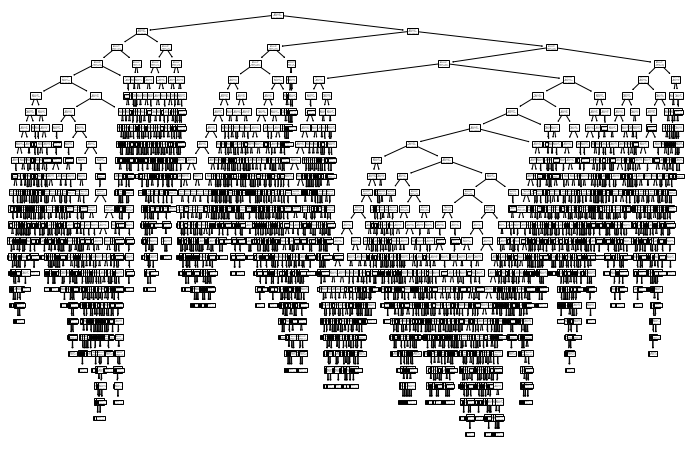

In [22]:
plt.figure(figsize=(12,8))

tree.plot_tree(classifier.fit(X_train, y_train)) 

### <span style='background : yellow' > **Q-5:(i) Print confusion matrix and classification report before Pruning Decision Tree:**   </span>

### CONFUSION MATRIX & CLASSIFICATION REPORT BEFORE PRUNING

In [23]:
print(confusion_matrix(y_test,y_pred))

[[2083  331]
 [ 368   92]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2414
           1       0.22      0.20      0.21       460

    accuracy                           0.76      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.76      0.75      2874



In [25]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : %.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall   : %.2f' % recall)
# f1: (2 * (precision * recall) ) / (precision + recall)
f1 = f1_score(y_test, y_pred, average=None)
f1_round = [round(num, 2) for num in f1]
print('F1 score for class 0 & class 1:', f1_round)

Accuracy : 0.76
Precision: 0.22
Recall   : 0.20
F1 score for class 0 & class 1: [0.86, 0.21]


### PRUNING OF DECISION TREE BY TRAVERSING THROUGH EACH DEPTH

In [26]:
accuracies = list()

max_attributes = len(list(X_train))

depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)   
        
    model = tree_model.fit(X_train, y_train) # We fit the model with the train data
    accuracy = model.score(X_test, y_test) # We calculate accuracy with the test data
    accuracies.append(accuracy)
      
dfnew = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dfnew = dfnew[["Max Depth", "Average Accuracy"]]
print(dfnew.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.839944
         2          0.839944
         3          0.839944
         4          0.838553
         5          0.836465
         6          0.834725
         7          0.830898
         8          0.827766
         9          0.822895
        10          0.818372
        11          0.808977
        12          0.800626
        13          0.796103


#### From this, the accuracy is constant upto depth 3 is declining thereafter, hence we can prune the decision tree to depth 3

In [27]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# fit the model
clf_gini.fit(X_train, y_train)

print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train, y_train)))

y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Training-set accuracy score: 0.8399
Model accuracy score with criterion gini index: 0.8399


#### Let's check the same with Entropy criterion instead of gini index

**Observation:** The accuracy scores using both methods: gini index & entropy are similar.

In [28]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

print('Training-set accuracy score: {0:0.4f}'. format(clf_en.score(X_train, y_train)))

y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Training-set accuracy score: 0.8399
Model accuracy score with criterion entropy: 0.8399


### <span style='background : yellow' > **Q-5:(ii) Print confusion matrix and classification report after Pruning Decision Tree:**   </span>

### CONFUSION MATRIX & CLASSIFICATION REPORT AFTER PRUNING USING ENTROPY & GINI CRITERIA

In [29]:
# Print the Confusion Matrix for decision tree of depth 3

cm1 = confusion_matrix(y_test, y_pred_en)

cm2 = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix - criterion entropy\n\n', cm1)

print('Confusion matrix - criterion gini\n\n', cm2)

Confusion matrix - criterion entropy

 [[2414    0]
 [ 460    0]]
Confusion matrix - criterion gini

 [[2414    0]
 [ 460    0]]


In [30]:
print('classification_report - criterion entropy\n\n', classification_report(y_test, y_pred_en))

print('classification_report - criterion gini\n\n', classification_report(y_test, y_pred_gini))

classification_report - criterion entropy

               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.00      0.00      0.00       460

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

classification_report - criterion gini

               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.00      0.00      0.00       460

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



### <span style='background : yellow' > **Q-6 Plot the final decision tree model:**   </span>

### FINAL DECISION TREE PLOT

[Text(502.20000000000005, 665.91, 'credit.policy <= 0.5\ngini = 0.269\nsamples = 6704\nvalue = [5631, 1073]\nclass = 0'),
 Text(251.10000000000002, 475.65, 'inq.last.6mths <= 5.5\ngini = 0.399\nsamples = 1308\nvalue = [948, 360]\nclass = 0'),
 Text(125.55000000000001, 285.39, 'purpose <= 4.5\ngini = 0.376\nsamples = 1011\nvalue = [757, 254]\nclass = 0'),
 Text(62.775000000000006, 95.13, 'gini = 0.386\nsamples = 930\nvalue = [687, 243]\nclass = 0'),
 Text(188.32500000000002, 95.13, 'gini = 0.235\nsamples = 81\nvalue = [70, 11]\nclass = 0'),
 Text(376.65000000000003, 285.39, 'int.rate <= 2.5\ngini = 0.459\nsamples = 297\nvalue = [191, 106]\nclass = 0'),
 Text(313.875, 95.13, 'gini = 0.487\nsamples = 177\nvalue = [103, 74]\nclass = 0'),
 Text(439.42500000000007, 95.13, 'gini = 0.391\nsamples = 120\nvalue = [88, 32]\nclass = 0'),
 Text(753.3000000000001, 475.65, 'int.rate <= 1.5\ngini = 0.229\nsamples = 5396\nvalue = [4683, 713]\nclass = 0'),
 Text(627.75, 285.39, 'revol.util <= 2.5\ngini 

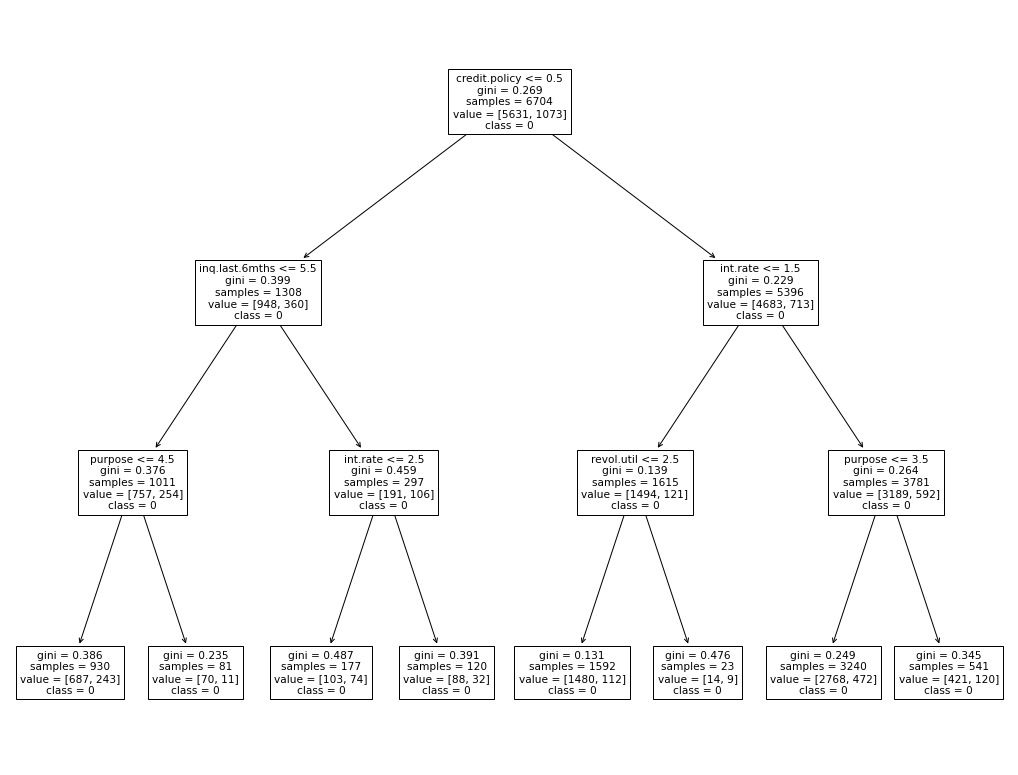

In [31]:
plt.figure(figsize=(18,14))

tree.plot_tree(clf_gini.fit(X_train, y_train),feature_names=list(X_train),class_names=['0','1']) 

### <span style='background : yellow' > **Q-7: Find out the stratified cross-validation accuracy:**   </span> 

### STRATIFIED CROSS VALIDATION  

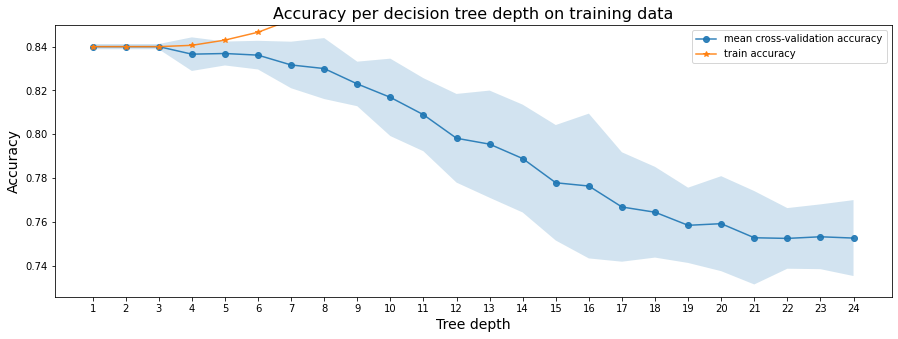

In [32]:
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(criterion='gini',max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        #For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. 
        #As per our data, cv is int, estimator is classigier & y is binary, hence StratifiedKFold is used
        
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [33]:
idx_max = sm_cv_scores_mean.argmax()
length = sm_cv_scores_mean.size
i = 0

for i in range(length-1): 
    if sm_cv_scores_mean[i+1] < sm_cv_scores_mean[i]:
        sm_best_tree_depth = sm_tree_depths[i]
        sm_best_tree_cv_score = sm_cv_scores_mean[i]
        break
        
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]

from colorama import Fore, Back, Style

print(Fore.BLUE, Style.BRIGHT, 'The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

  The depth-3 tree achieves the best mean cross-validation accuracy 83.99466 +/- 0.05936% on training dataset


In [34]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print(Fore.BLUE, Style.BRIGHT, 'Best Tree depth    : ', depth)
    print(Fore.BLUE, Style.BRIGHT, 'Accuracy, Train Set: ', round(accuracy_train*100,4), '%')
    print(Fore.BLUE, Style.BRIGHT, 'Accuracy, Test Set : ', round(accuracy_test*100,4), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 3-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, X_test, y_test, sm_best_tree_depth)

  Best Tree depth    :  3
  Accuracy, Train Set:  83.9946 %
  Accuracy, Test Set :  83.9944 %


### CONCLUSION:

#### We can conclude that the best tree depth is 3 for our decision tree model and the accuracy scores are as above